In [3]:

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
DF = pd.read_csv("cleaned_departures_development_traffic1.csv")
print(DF)
DF = DF.drop(columns=["Name", "Development_Level", "Traffic"])
DF = DF[~DF["Area"].isin(["High", "Low", "Medium"])]

     Departures  Domestic  International  FlagCarrier_Flights          Name  \
0          7422         0           7422                 1925         Aruba   
1         11822      8395           3427                11496   Afghanistan   
2          4978      2907           2071                 5891        Angola   
3          3742         8           3734                 2249      Anguilla   
4          6535         0           6535                 4085       Albania   
..          ...       ...            ...                  ...           ...   
217         807         0            807                 1132         Samoa   
218         463         8            455                  560         Yemen   
219       96704     76147          20557               102696  South Africa   
220       10390      6394           3996                 6648        Zambia   
221        7577      2896           4681                 3866      Zimbabwe   

         Area Development_Level   Traffic  
0    Am

In [6]:
DF_Train, DF_Test=train_test_split(DF,test_size=.30)
print("The Training Data is\n", DF_Train)
print("The Testing Data is\n", DF_Test)

## Now remove the labels from the data - but keep and name the labels
TrainLabel = DF_Train["Area"]
print(TrainLabel)
## Remove the label from the dataset itself
DF_Train = DF_Train.drop(["Area"], axis=1)
print(DF_Train)

TestLabel = DF_Test["Area"]
print(TestLabel)
## Remove the label from the dataset itself
DF_Test = DF_Test.drop(["Area"], axis=1)
print(DF_Test)

The Training Data is
      Departures  Domestic  International  FlagCarrier_Flights      Area
117       11455         0          11455                 2242    Europe
38         6050       390           5660                 2582    Africa
34          110         0            110                    0   Pacific
212       14826      1511          13315                 2267  Americas
17         3204       556           2648                 3519    Africa
..          ...       ...            ...                  ...       ...
201      186424    125071          61353               224016      Asia
220       10390      6394           3996                 6648    Africa
85         6559        12           6547                    0   Pacific
145         218         0            218                    0   Pacific
56        25319     15908           9411                27219    Africa

[151 rows x 5 columns]
The Testing Data is
      Departures  Domestic  International  FlagCarrier_Flights      Ar

In [8]:
#Instantiate the decision tree using the defaults.
MyDT_Classifier = DecisionTreeClassifier()

## Use fit to create the decision tree (DT) model
## This line of code (below) creates the decision tree model.
MyDT_Classifier = MyDT_Classifier.fit(DF_Train, TrainLabel)

FeatureNames=DF_Train.columns.values ## get all the feature/variable names
print(FeatureNames)
ClassNames=MyDT_Classifier.classes_ ## Get the class names
print(ClassNames)

['Departures' 'Domestic' 'International' 'FlagCarrier_Flights']
['Africa' 'Americas' 'Asia' 'Europe' 'Pacific']


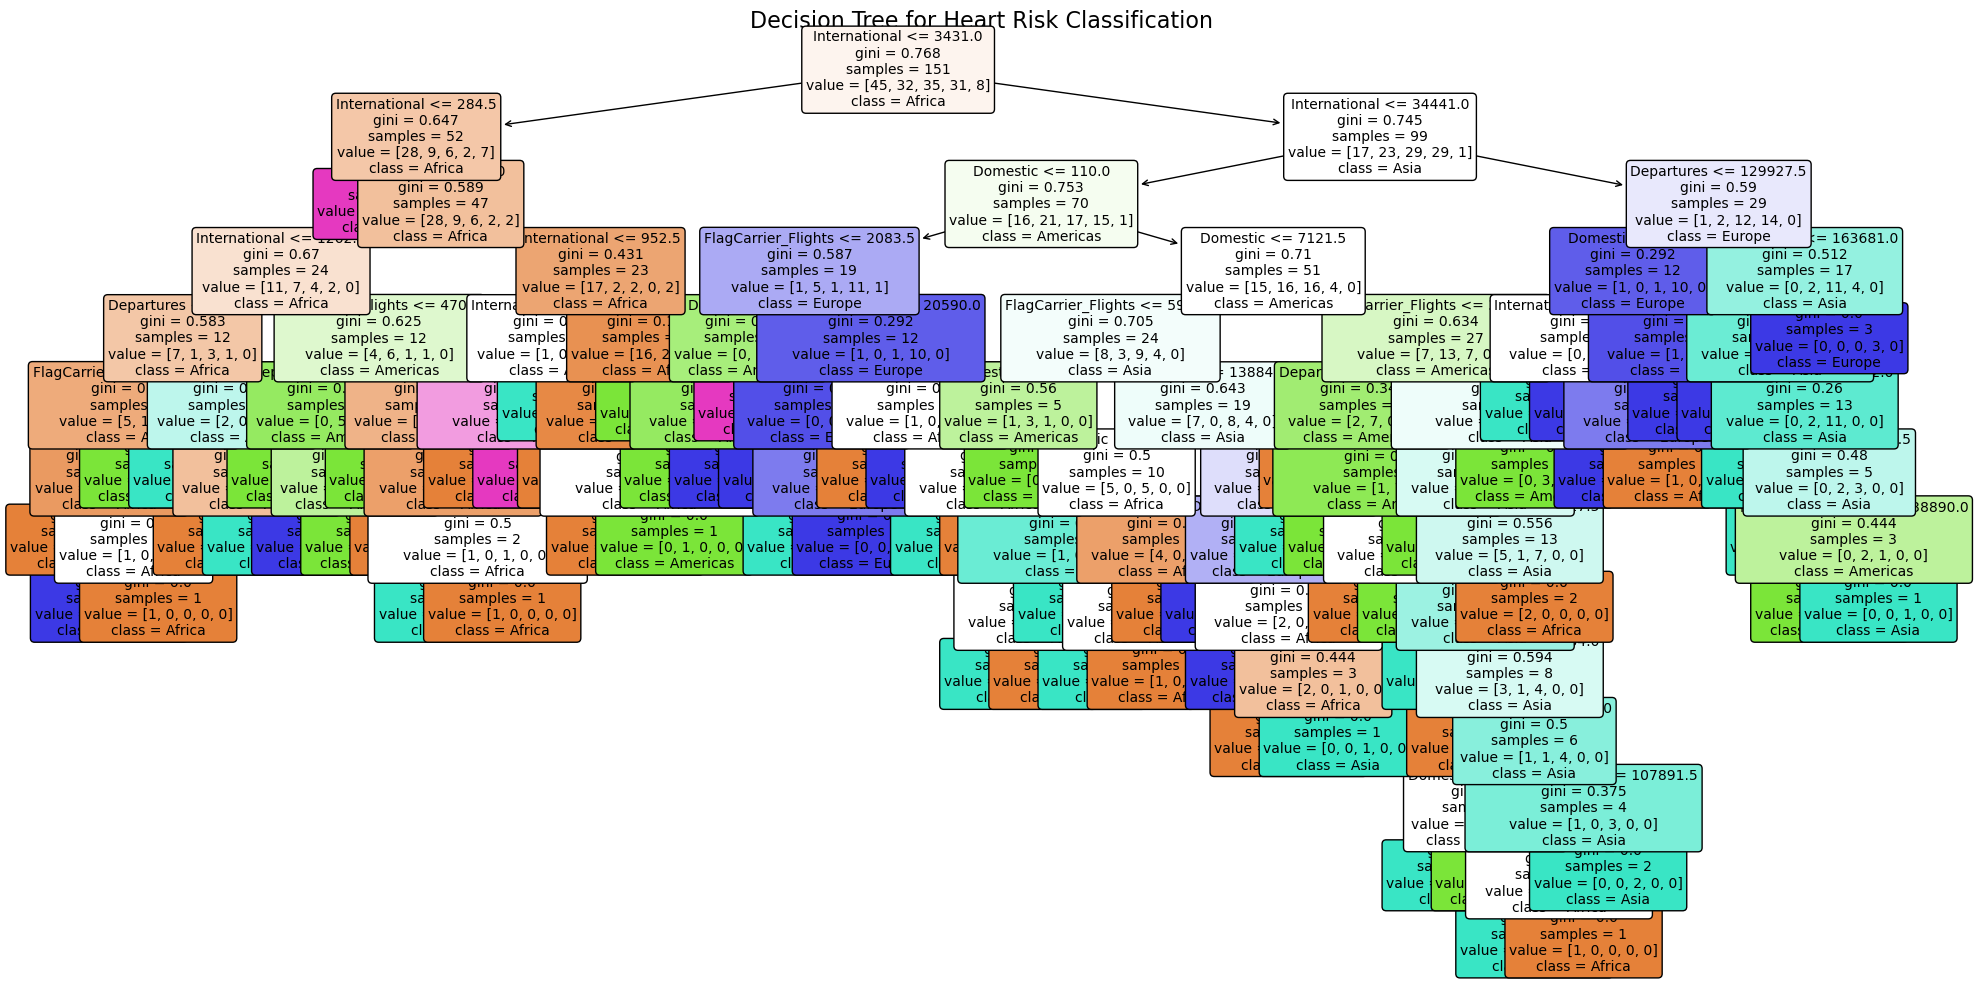

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set figure size for clarity
plt.figure(figsize=(20, 10))

# Plot the tree
plot_tree(
    MyDT_Classifier,
    feature_names=FeatureNames,
    class_names=ClassNames,
    filled=True,
    rounded=True,
    fontsize=10
)

# Set title and show
plt.title("Decision Tree for Heart Risk Classification", fontsize=16)
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
ClassNames = ['Africa', 'Americas', 'Asia', 'Europe', 'Pacific']

Prediction=MyDT_Classifier.predict(DF_Test)
print(Prediction)

Actual_Labels=TestLabel
Predicted_Labels=Prediction

##Create the Basic Confusion Matrix
My_Conf_Mat = confusion_matrix(Actual_Labels, Predicted_Labels)
print(My_Conf_Mat)
##Create the fancy CM using Seaborn
sns.heatmap(My_Conf_Mat, annot=True,cmap='Blues',xticklabels=ClassNames, 
yticklabels=ClassNames, cbar=False)
plt.title("Confusion Matrix For Traffic Data",fontsize=20)
plt.xlabel("Actual", fontsize=15)
plt.ylabel("Predicted", fontsize=15)

plt.savefig("seaborn_plot.jpg")
plt.close()

## Confusion Matrix Plot Option 2
CM_disp=ConfusionMatrixDisplay(confusion_matrix=My_Conf_Mat,
                               display_labels=ClassNames)
CM_disp.plot()
plt.savefig("CM.jpg")
plt.close()



['Europe' 'Europe' 'Europe' 'Asia' 'Asia' 'Africa' 'Europe' 'Africa'
 'Americas' 'Pacific' 'Africa' 'Pacific' 'Europe' 'Asia' 'Europe'
 'Americas' 'Americas' 'Asia' 'Americas' 'Americas' 'Africa' 'Europe'
 'Americas' 'Asia' 'Americas' 'Africa' 'Africa' 'Europe' 'Pacific'
 'Africa' 'Europe' 'Pacific' 'Africa' 'Africa' 'Europe' 'Africa' 'Africa'
 'Africa' 'Asia' 'Africa' 'Africa' 'Pacific' 'Europe' 'Americas'
 'Americas' 'Africa' 'Africa' 'Asia' 'Europe' 'Africa' 'Europe' 'Americas'
 'Asia' 'Africa' 'Americas' 'Europe' 'Americas' 'Pacific' 'Asia' 'Pacific'
 'Africa' 'Americas' 'Asia' 'Africa' 'Asia' 'Pacific']
[[6 3 2 0 0]
 [8 5 1 3 1]
 [3 2 2 3 0]
 [0 2 3 6 2]
 [3 1 3 2 5]]


Predictions:  ['Europe' 'Europe' 'Europe' 'Asia' 'Asia' 'Africa' 'Europe' 'Africa'
 'Americas' 'Pacific' 'Africa' 'Pacific' 'Europe' 'Asia' 'Europe'
 'Americas' 'Americas' 'Asia' 'Americas' 'Americas' 'Africa' 'Europe'
 'Americas' 'Asia' 'Americas' 'Africa' 'Africa' 'Europe' 'Pacific'
 'Africa' 'Europe' 'Pacific' 'Africa' 'Africa' 'Europe' 'Africa' 'Africa'
 'Africa' 'Asia' 'Africa' 'Africa' 'Pacific' 'Europe' 'Americas'
 'Americas' 'Africa' 'Africa' 'Asia' 'Europe' 'Africa' 'Europe' 'Americas'
 'Asia' 'Africa' 'Americas' 'Europe' 'Americas' 'Pacific' 'Asia' 'Pacific'
 'Africa' 'Americas' 'Asia' 'Africa' 'Asia' 'Pacific']
Confusion Matrix:
 [[6 3 2 0 0]
 [8 5 1 3 1]
 [3 2 2 3 0]
 [0 2 3 6 2]
 [3 1 3 2 5]]


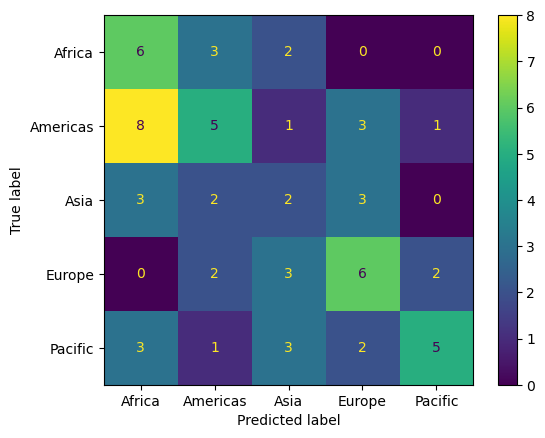

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

ClassNames = ['Africa', 'Americas', 'Asia', 'Europe', 'Pacific']

# Make sure you have the prediction results from your model
Prediction = MyDT_Classifier.predict(DF_Test)
print("Predictions: ", Prediction)

# Ensure you have the true labels
Actual_Labels = TestLabel
Predicted_Labels = Prediction

# Create the confusion matrix
My_Conf_Mat = confusion_matrix(Actual_Labels, Predicted_Labels)
print("Confusion Matrix:\n", My_Conf_Mat)  # Print confusion matrix here

# Create the heatmap using Seaborn
sns.heatmap(My_Conf_Mat, annot=True, cmap='Blues', xticklabels=ClassNames, 
            yticklabels=ClassNames, cbar=False)
plt.title("Confusion Matrix For Traffic Data", fontsize=20)
plt.xlabel("Actual", fontsize=15)
plt.ylabel("Predicted", fontsize=15)

# Save the heatmap plot
plt.savefig("seaborn_plot.jpg")
plt.close()

# Confusion Matrix Plot Option 2
CM_disp = ConfusionMatrixDisplay(confusion_matrix=My_Conf_Mat, display_labels=ClassNames)
CM_disp.plot()



Accuracy: 0.3636
Precision (weighted): 0.3994


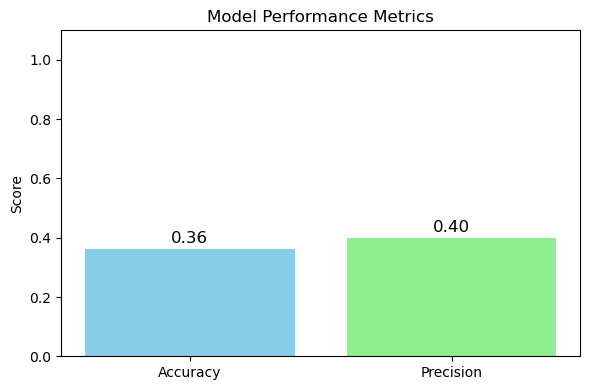

In [14]:
from sklearn.metrics import accuracy_score, precision_score
import matplotlib.pyplot as plt

# ----------------------------------
# Accuracy and Precision
# ----------------------------------
accuracy = accuracy_score(Actual_Labels, Predicted_Labels)
precision = precision_score(Actual_Labels, Predicted_Labels, average='weighted')  # or 'macro'

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")

# ----------------------------------
# Visualization (Bar Chart)
# ----------------------------------
metrics = ['Accuracy', 'Precision']
values = [accuracy, precision]

plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, values, color=['skyblue', 'lightgreen'])

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}", ha='center', fontsize=12)

plt.ylim(0, 1.1)
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
